# Funções de primeira classe

Parte III - Funções como objetos | Capítulo 5 - Python Fluente - Luciano Ramalho

Python como uma linguagem de programação funcional, no qual tem como marca registrada o uso de funções de ordem superior.

## Útil

Todas funções em Python são objetos de primeira classe, podendo ser uma "entidade" como:
- criada em tempo de execução;
- atribuída a uma variável ou a um elemento em uma estrutura de dados;
- passada como argumento a uma função;
- devolvida como resultado de uma função.

e.g.: int, str, dict

Funções de ordem superior são uma marca registrada da programação funcional.
- sorted, mic, max e functools.partial são alguns dos exemplos;
- assim como map, filter e reduce (não tão utilizados com a criação das list comprehensions e sum, all e any.

## Função como um objeto

Um objeto função é uma instância da classe `function`, e ainda assim, objetos.

Em uma sessão de console, criamos a função em tempo de execução.

In [ ]:
def fatorial(n):
    """Returns n!."""
    return (
        1 if n < 2
        else n * fatorial (n - 1)
    )

In [ ]:
fatorial(30)

265252859812191058636308480000000

O `doc` é um dos atributos de objetos-função.

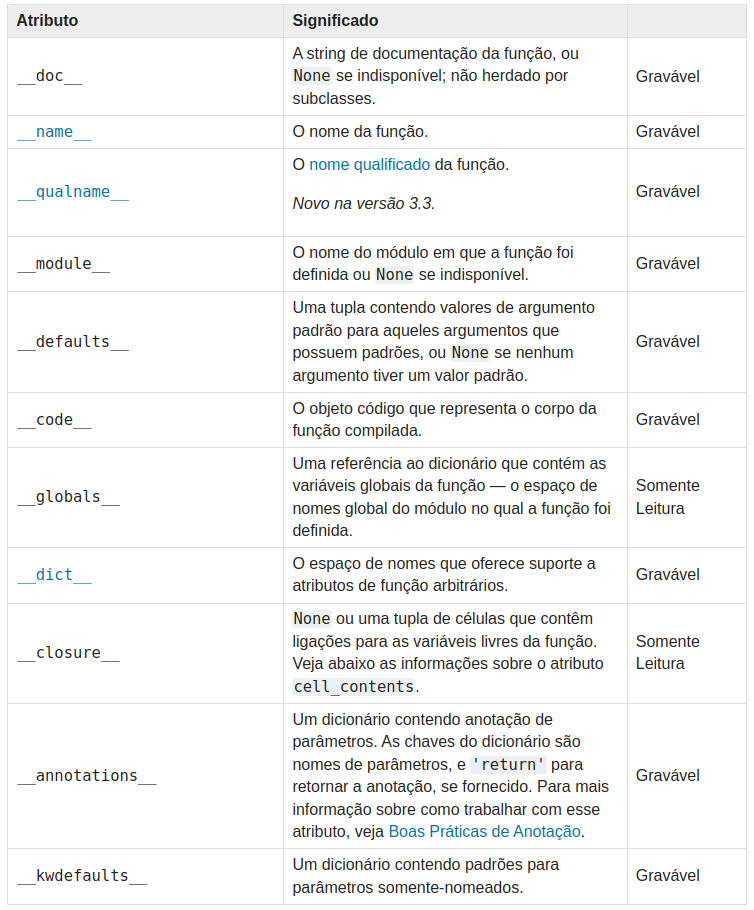

Disponível em:
https://docs.python.org/pt-br/3.10/reference/datamodel.html

In [ ]:
fatorial.__doc__

'Returns n!.'

In [ ]:
type(fatorial)

function

In [ ]:
fatorial.__module__

'__main__'

In [ ]:
help(fatorial)

Help on function fatorial in module __main__:

fatorial(n)
    Returns n!.



A natureza da "primeira classe" de um objeto-função faz com que possamos atribuir a uma outra variável e chamá-la pelo novo nome.

In [ ]:
outro_fatorial = fatorial

In [ ]:
fatorial

<function __main__.fatorial(n)>

In [ ]:
outro_fatorial(2)

2

A função `map` devolve um iterável em que cada item é o resultado da aplicação do primeiro argumento (uma função) a elementos sucessivos do segundo argumento (um iterável).

In [ ]:
map(fatorial, range(10))

In [ ]:
list(map(fatorial, range(10)))

[1, 1, 2, 6, 24, 120, 720, 5040, 40320, 362880]

In [ ]:
list(map(fatorial, [23, 45, 50, 100, 234]))

[25852016738884976640000,
 119622220865480194561963161495657715064383733760000000000,
 30414093201713378043612608166064768844377641568960512000000000000,
 93326215443944152681699238856266700490715968264381621468592963895217599993229915608941463976156518286253697920827223758251185210916864000000000000000000000000,
 22670150051024339208842996793945853659618105149432332891909162781453188496185286163298606516694886905607365190190959563064612945338703694136857684356961467817193275159683377314353662443780840896397239708288581036699483832395636246310971241224996315914676173236435465798388095261168098119711919219177465172417531870533071210963890951079600651352649259865692984172459046697905169775036847325733034393600000000000000000000000000000000000000000000000000000000]

## Funções de ordem superior

Quando uma função aceita uma função como argumento ou que devolve uma função como resultado é uma **higher-order function**.

e.g.: `map`, `filter`, `reduce`.

In [ ]:
names = ['Mariana', 'Lucas', 'Rioja']

# O argumento key é opcional e permite especificar uma função
# a ser aplicado a cada item para ordenação.
sorted(names, key=len)

['Lucas', 'Rioja', 'Mariana']

### Substitutos para map, filter e reduce

Listcomp ou genexp fazem o trabalho conjunto de `map` com `range` ou `filter`.

In [ ]:
list(map(fatorial, range(5)))

[1, 1, 2, 6, 24]

In [ ]:
[fatorial(n) for n in range(5)]

[1, 1, 2, 6, 24]

In [ ]:
list(map(fatorial, filter(lambda n: n % 2, range(5))))

[1, 6]

In [ ]:
[fatorial(n) for n in range(5) if n % 2]

[1, 6]

Função `reduce` do módulo functools.

In [ ]:
from functools import reduce
from operator import add

reduce(add, range(100))

4950

In [ ]:
sum(range(100))

4950

### Funções anônimas

A palavra reservada `lambda` cria uma função anônima em uma expressão Python.
O corpo de um lambda não pode fazer atribuições com outros comandos (while, try, etc).

A expressão `lambda` cria um objeto função assim como o comando `def`.

In [ ]:
a = 'Mariana'

In [ ]:
a[::-1]

'anairaM'

In [ ]:
sorted(names, key=lambda x: x[::-1])

['Rioja', 'Mariana', 'Lucas']

**Método Lundh para refatorar lambdas** é conveniente quando um trecho de código com essa função anônima for difícil de entender.

Passos sugeridos em Functional Programming HOWTO, disponível em: https://docs.python.org/3/howto/functional.html

### 7 variações de objetos invocáveis

Operador de invocação () - call operator, pode ser aplicado além de algumas funções definidas pelo próprio usuário.

Para determinar se um objetos é ou não invocável, convém utilizar a função embutida `callable()`.

1. Funções definidas pelo usuário (`def` ou `lambda`)
2. Funções embutidas (`len`, `time.strftime`)
3. Métodos embutidos (`dict.get`)
4. Métodos - Funções definidas no corpo de uma classe pelo usuário
5. Classes (Quando chamada, cria uma instância da mesma classe)
6. Instâncias de classe (Se tiver o método `call`, suas instâncias podem ser chamadas como funções)
7. Funções geradoras (`yield` - devolve um objeto gerador)

In [ ]:
abs, str, 13

(<function abs(x, /)>, str, 13)

In [ ]:
[callable(objeto) for objeto in (abs, str, 13)]

[True, True, False]

#### Invocáveis pelo usuário

In [ ]:
import random

class BingoCage:

    def __init__(self, items):
        self._items = list(items)
        random.shuffle(self._items)

    def pick(self):
        try:
            return self._items.pop()
        except IndexError:
            raise LookupError('Pick from empty BingoCage')

    def __call__(self):
        return self.pick()


In [ ]:
bingo = BingoCage(range(3))

In [ ]:
bingo.pick()

2

In [ ]:
# Permite o call direto na classe, a partir dos métodos implementados.
# Nesse exemplo, volta o pick sem a necessidade de chamá-lo diretamente.

bingo()

1

In [ ]:
callable(bingo)

False

Os `decoradores` (*decorators*) devem ser funções, mas, às vezes, será conveniente poder "lembrar-se" de alguma informação entre as chamadas do decorador. Por exemplo para memoização - caching de resultados de processamentos intensivos para uso posterior.

In [ ]:
# Fibonacci usando memoização.

def fibonacci(n, cache={}):
    print(n, cache)
    if n in cache:
        print(n, "-", cache)
        return cache[n]

    if n <= 2:
        return 1
    else:
        result = fibonacci(n-1) + fibonacci(n-2)
        print(n, result)
        cache[n] = result
        return result

print(fibonacci(5))

5 {}
4 {}
3 {}
2 {}
1 {}
3 2
2 {3: 2}
4 3
3 {3: 2, 4: 3}
3 - {3: 2, 4: 3}
5 5
5


In [ ]:
import dis

dis.dis(fibonacci)

  4           0 LOAD_FAST                0 (n)
              2 LOAD_FAST                1 (cache)
              4 COMPARE_OP               6 (in)
              6 POP_JUMP_IF_FALSE       16

  5           8 LOAD_FAST                1 (cache)
             10 LOAD_FAST                0 (n)
             12 BINARY_SUBSCR
             14 RETURN_VALUE

  7     >>   16 LOAD_FAST                0 (n)
             18 LOAD_CONST               1 (2)
             20 COMPARE_OP               1 (<=)
             22 POP_JUMP_IF_FALSE       28

  8          24 LOAD_CONST               2 (1)
             26 RETURN_VALUE

 10     >>   28 LOAD_GLOBAL              0 (fibonacci)
             30 LOAD_FAST                0 (n)
             32 LOAD_CONST               2 (1)
             34 BINARY_SUBTRACT
             36 CALL_FUNCTION            1
             38 LOAD_GLOBAL              0 (fibonacci)
             40 LOAD_FAST                0 (n)
             42 LOAD_CONST               1 (2)
             44 

### Introspecção de função

In [ ]:
# Atributos disponíveis em uma função

dir(fibonacci)

['__annotations__',
 '__call__',
 '__class__',
 '__closure__',
 '__code__',
 '__defaults__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__get__',
 '__getattribute__',
 '__globals__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__kwdefaults__',
 '__le__',
 '__lt__',
 '__module__',
 '__name__',
 '__ne__',
 '__new__',
 '__qualname__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__']

Vamos discutir os atributos que são relevantes ao tratamento de funções como objetos (como o `__dict__`).

O `__dict__` armazena atributos de usuário atribuídos a ela. É útil como uma forma primitiva de anotação. O Django acaba usando bastante isso no Admin: `short_description`, `boolean` e `allo_tags` são alguns exemplos.

In [ ]:
def upper_case_name(obj):
    return f'{obj.first_name.upper()} {obj.last_name}'

#### Atributos de funções que não existem em instâncias simples

In [ ]:
class C:
    pass

In [ ]:
objeto = C()

In [ ]:
def funcao():
    pass

In [ ]:
funcao_atributos = set(dir(funcao))
funcao_atributos

{'__annotations__',
 '__call__',
 '__class__',
 '__closure__',
 '__code__',
 '__defaults__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__get__',
 '__getattribute__',
 '__globals__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__kwdefaults__',
 '__le__',
 '__lt__',
 '__module__',
 '__name__',
 '__ne__',
 '__new__',
 '__qualname__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__'}

In [ ]:
classe_atributos = set(dir(C))
classe_atributos

{'__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__'}

In [ ]:
sorted(funcao_atributos - classe_atributos)

['__annotations__',
 '__call__',
 '__closure__',
 '__code__',
 '__defaults__',
 '__get__',
 '__globals__',
 '__kwdefaults__',
 '__name__',
 '__qualname__']

In [ ]:
def mari(a=1):
    pass

mari.__defaults__

(1,)

## Parâmetros exclusivamente nomeados

In [1]:
def tag(name, *content, cls=None, **attrs):
    """Generate one or more HTML tags"""

    print(name, cls, attrs, content)

    if cls is not None:
        attrs['class'] = cls

    if attrs:
        attr_str = ''.join(
            ' %s="%s"' % (attr, value)
            for attr, value
            in sorted(attrs.items())
        )
    else:
        attr_str = ''

    if content:
        return '\n'.join(
            '<%s%s>%s</%s>' % (name, attr_str, c, name)
            for c in content
        )
    else:
        return '<%s%s />' % (name, attr_str)

In [2]:
tag('rioja', 'mari', 'lucas')

rioja None {} ('mari', 'lucas')


'<rioja>mari</rioja>\n<rioja>lucas</rioja>'

In [6]:
tag('rioja', cls='mari', a='lucas')

rioja mari {'a': 'lucas'} ()


'<rioja a="lucas" class="mari" />'

In [ ]:
tag('br')

br None {} ()


'<br />'

In [ ]:
tag('p', 'hello')

p None {} ('hello',)


'<p>hello</p>'

In [ ]:
print(tag('p', 'hello', 'word'))

p None {} ('hello', 'word')
<p>hello</p>
<p>word</p>


In [ ]:
tag('p', 'hello', id=33)

p None {'id': 33} ('hello',)


'<p id="33">hello</p>'

In [ ]:
print(tag('p', 'hello', 'word', cls='sidebar'))

p sidebar {} ('hello', 'word')
<p class="sidebar">hello</p>
<p class="sidebar">word</p>


In [ ]:
tag(content='testing', name='img')

img None {'content': 'testing'} ()


'<img content="testing" />'

In [ ]:
my_tag = {
    'name': 'img',
    'title': 'Sunset Boulevard',
    'src': 'sunset.jpg',
    'cls': 'framed'
}

O ** faz com que todos os itens passados como argumentos separados sejam associados aos nomeados, e o restante capturado por **attrs.

In [ ]:
tag(**my_tag)

img framed {'title': 'Sunset Boulevard', 'src': 'sunset.jpg'} ()


'<img class="framed" src="sunset.jpg" title="Sunset Boulevard" />'

Para especificar argumentos exclusivamente nomeados ao definir uma função, nomear após o argumento prefixado com *.

Se não quiser aceitar argumentos posicionais variáveis, e ainda quiser ter argumentos exclusivamente nomeados, colocar um * sozinho na assinatura da função.

E, portanto, os argumentos exclusivamente nomeados não precisam ter um default. Nesse caso, eles podem ser obrigatórios.

In [8]:
def f(a, *, b):
    return a, b

f(1, b=2)

(1, 2)

In [9]:
f(1, 2)

TypeError: ignored

### Informações sobre parâmetros

In [ ]:
import bobo

@bobo.query('/')
def hello(person):
    return f'Hello, {person}'


"""
bobo -f infos_params.py -p 8080
http://localhost:8080/
"""

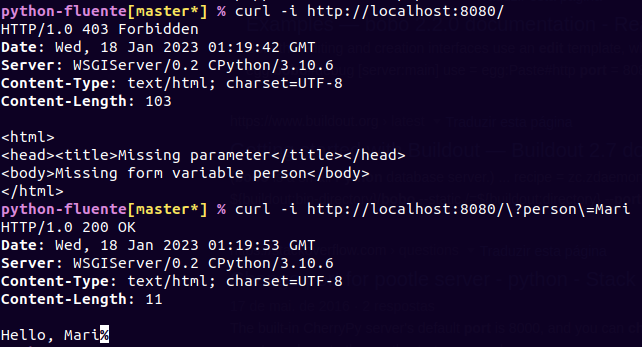

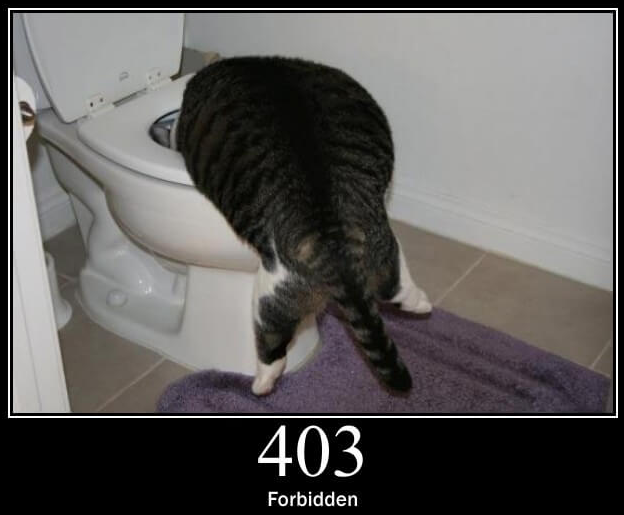

O Forbidden acontece pois teve argumentos de função ausentes na requisição.

In [ ]:
def clip(text, max_len=80):
    """
    Return text clipped at the last space before or after max_len
    """
    end = None
    if len(text) > max_len:
        space_before = text.rfind(' ', 0, max_len)
        if space_before >= 0:
            end = space_before
        else:
            space_after = text.rfind(' ', max_len)
            if space_after >= 0:
                end = space_after
    if end is None:  # no spaces were found
        end = len(text)
    return text[:end].rstrip()

In [ ]:
clip.__defaults__

(80,)

In [ ]:
clip.__code__

<code object clip at 0x7fa71aa12030, file "<ipython-input-32-f97dc470cea1>", line 1>

In [ ]:
clip.__code__.co_varnames

('text', 'max_len', 'end', 'space_before', 'space_after')

In [ ]:
clip.__code__.co_argcount

2

In [ ]:
from inspect import signature

sig = signature(clip)
sig # doctest: +ELLIPSIS

<Signature (text, max_len=80)>

In [ ]:
str(sig)

'(text, max_len=80)'

In [ ]:
# Extraindo a assinatura da função.

for name, param in sig.parameters.items():
    print(param.kind, ':', name, '=', param.default)

POSITIONAL_OR_KEYWORD : text = <class 'inspect._empty'>
POSITIONAL_OR_KEYWORD : max_len = 80


#### Validando argumentos antes da chamada de uma função

In [ ]:
import inspect

sig = inspect.signature(tag)
bound_args = sig.bind(**my_tag)
bound_args

<BoundArguments (name='img', cls='framed', attrs={'title': 'Sunset Boulevard', 'src': 'sunset.jpg'})>

In [ ]:
del my_tag['name']

In [ ]:
bound_args = sig.bind(**my_tag)

TypeError: ignored

## Anotações de funções

In [ ]:
def clip(text: str, max_len:'int > 0'=80) -> str:
    """
    Return text clipped at the last space before or after max_len
    """
    end = None
    if len(text) > max_len:
        space_before = text.rfind(' ', 0, max_len)
        if space_before >= 0:
            end = space_before
        else:
            space_after = text.rfind(' ', max_len)
            if space_after >= 0:
                end = space_after
    if end is None:  # no spaces were found
        end = len(text)
    return text[:end].rstrip()

In [ ]:
# Nenhum processamento é feito com as anotações,
# elas são simplesmente armazenadas no atributo __annotations__.

clip.__annotations__

{'text': str, 'max_len': 'int > 0', 'return': str}

In [ ]:
from inspect import signature

sig = signature(clip)
sig.return_annotation

str

## Pacotes para programação funcional

Apesar do Python não ter como objetivo ser uma linguagem de programação funcional, esse estilo pode ser utilizado de forma ampla, graças ao suporte oferencido por pacotes como **operator** e **functools**.

In [ ]:
# Na PF é conveniente usar um operador aritmético como função.

from functools import reduce

def fatorial(n):
    """
    Multiplicar uma sequência de números para calcular fatoriais sem recursão.
    """
    return reduce(lambda a, b: a*b, range(1, n+1))


In [ ]:
fatorial(10)

3628800

In [ ]:
# O módulo operator tem muitas funções triviais da matemática.

from operator import mul

def fatorial_com_operator(n):
    return reduce(mul, range(1, n+1))

In [ ]:
fatorial_com_operator(10)

3628800

### itemgetter

Uso comum do itemgetter: ordenar uma lista de tuplas de acordo com o valor de um cqampo.

In [ ]:
metro_data = [
    ('Tokyo', 'JP', 36.955, (12, 13)),
    ('Delhi', 'IN', 21, 933, (28, 29)),
    ('Mexico City', 'MX', 20.142, (13, 15)),
    ('Sao Paulo', 'BR', 19.324, (35, 36))
]

In [ ]:
from operator import itemgetter

for city in sorted(metro_data, key=itemgetter(1)):
    print(city)

('Sao Paulo', 'BR', 19.324, (35, 36))
('Delhi', 'IN', 21, 933, (28, 29))
('Tokyo', 'JP', 36.955, (12, 13))
('Mexico City', 'MX', 20.142, (13, 15))


In [ ]:
for city in sorted(metro_data, key=lambda x: x[1]):
    print(city)

('Sao Paulo', 'BR', 19.324, (35, 36))
('Delhi', 'IN', 21, 933, (28, 29))
('Tokyo', 'JP', 36.955, (12, 13))
('Mexico City', 'MX', 20.142, (13, 15))


In [ ]:
# Para puxar apenas itens específicos de uma lista de tupla

names = itemgetter(1, 0)

for city in metro_data:
    print(names(city))

('JP', 'Tokyo')
('IN', 'Delhi')
('MX', 'Mexico City')
('BR', 'Sao Paulo')


### attrgetter

In [ ]:
metro_data

[('Tokyo', 'JP', 36.955, (12, 13)),
 ('Delhi', 'IN', 21, 933, (28, 29)),
 ('Mexico City', 'MX', 20.142, (13, 15)),
 ('Sao Paulo', 'BR', 19.324, (35, 36))]

In [ ]:
from operator import attrgetter

name_lat = attrgetter('name', 'coord.lat')
name_lat

operator.attrgetter('name', 'coord.lat')

### methodcaller

In [ ]:
from operator import methodcaller

s = 'The time has come'
upcase = methodcaller('upper')
upcase(s)

'THE TIME HAS COME'

In [ ]:
hiphenate = methodcaller('replace', ' ', '-')
hiphenate(s)

'The-time-has-come'

### Funções definidas em operator

In [ ]:
import operator

[name for name in dir(operator) if not name.startswith('_')]

['abs',
 'add',
 'and_',
 'attrgetter',
 'concat',
 'contains',
 'countOf',
 'delitem',
 'eq',
 'floordiv',
 'ge',
 'getitem',
 'gt',
 'iadd',
 'iand',
 'iconcat',
 'ifloordiv',
 'ilshift',
 'imatmul',
 'imod',
 'imul',
 'index',
 'indexOf',
 'inv',
 'invert',
 'ior',
 'ipow',
 'irshift',
 'is_',
 'is_not',
 'isub',
 'itemgetter',
 'itruediv',
 'ixor',
 'le',
 'length_hint',
 'lshift',
 'lt',
 'matmul',
 'methodcaller',
 'mod',
 'mul',
 'ne',
 'neg',
 'not_',
 'or_',
 'pos',
 'pow',
 'rshift',
 'setitem',
 'sub',
 'truediv',
 'truth',
 'xor']

## Congelando argumentos com functools.partial

**functools** reúne uma porção de funções de ordem superior.


In [ ]:
from operator import mul
from functools import partial

triple = partial(mul, 3)
triple(7)

21

In [ ]:
list(map(triple, range(1, 10)))

[3, 6, 9, 12, 15, 18, 21, 24, 27]